In [1]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import matplotlib.pyplot as plt
import rasterio
from skimage import measure
import numpy as np

In [107]:
mask_src = rasterio.open(
    "/net/scratch/jmoehring/inference/100k_samples_biome_stratified_treefold_smallval_testset/uavforsat_2017_CFB050_ortho.tif"
)

In [2]:
image_src = rasterio.open(
    "/net/data_ssd/tree_mortality_orthophotos/orthophotos/spain_20_09_2023_south_tejeda_1_ortho.tif"
)

In [109]:
contours = measure.find_contours(image=mask_src.read(1), level=0.5)

NameError: name 'mask_src' is not defined

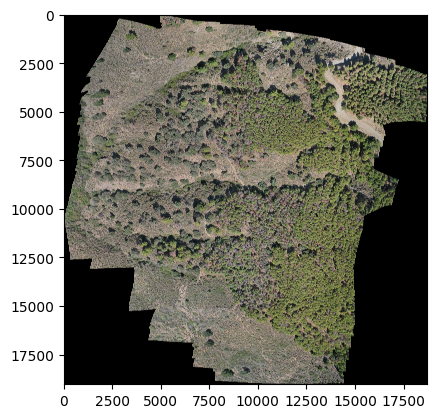

In [3]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(np.moveaxis(image_src.read(), 0, -1), cmap=plt.cm.gray)


# for contour in contours:
#     ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color="orange")

ax.axis()
print(mask_src.width)
print(mask_src.height)

ax.set_xlim(0, image_src.width)
ax.set_ylim(image_src.height, 0)

# ax.set_xlim(10500, 14500)
# ax.set_ylim(14500, 10500)

plt.show()

In [ ]:
plt.savefig("contour1.png", dpi=100)

In [39]:
contours

[array([[ 397.5, 2127. ],
        [ 397.5, 2126. ],
        [ 397.5, 2125. ],
        [ 397.5, 2124. ],
        [ 397.5, 2123. ],
        [ 397.5, 2122. ],
        [ 397.5, 2121. ],
        [ 397.5, 2120. ],
        [ 397. , 2119.5],
        [ 396.5, 2119. ],
        [ 396.5, 2118. ],
        [ 396.5, 2117. ],
        [ 396. , 2116.5],
        [ 395.5, 2116. ],
        [ 395.5, 2115. ],
        [ 395.5, 2114. ],
        [ 395. , 2113.5],
        [ 394.5, 2113. ],
        [ 394.5, 2112. ],
        [ 394.5, 2111. ],
        [ 394.5, 2110. ],
        [ 394.5, 2109. ],
        [ 394. , 2108.5],
        [ 393.5, 2108. ],
        [ 393.5, 2107. ],
        [ 393. , 2106.5],
        [ 392.5, 2106. ],
        [ 392.5, 2105. ],
        [ 392. , 2104.5],
        [ 391.5, 2104. ],
        [ 391. , 2103.5],
        [ 390.5, 2103. ],
        [ 390. , 2102.5],
        [ 389.5, 2102. ],
        [ 389. , 2101.5],
        [ 388.5, 2101. ],
        [ 388.5, 2100. ],
        [ 388. , 2099.5],
        [ 38

In [3]:
register_df = pd.read_csv("/net/scratch/jmoehring/tiles_register_biome_bin.csv")

In [4]:
register_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215181 entries, 0 to 1215180
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   base_file_name  1215181 non-null  object 
 1   file_path       1215181 non-null  object 
 2   resolution      1215181 non-null  float64
 3   x               1215181 non-null  int64  
 4   y               1215181 non-null  int64  
 5   label_quality   1193120 non-null  float64
 6   biome           1215181 non-null  float64
 7   resolution_bin  1215181 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 74.2+ MB


In [5]:
images_df = register_df.groupby("base_file_name").min("resolution_bin").reset_index()

In [155]:
register_df[register_df["file_path"].str.contains("13905_8833.tif")]

,base_file_name,file_path,resolution,x,y,label_quality,biome,resolution_bin
317072,uavforsat_2017_CFB036_ortho.tif,/net/scratch/jmoehring/tiles/uavforsat_2017_CF...,0.009,13905,8833,3.0,4.0,0.0


<Axes: >

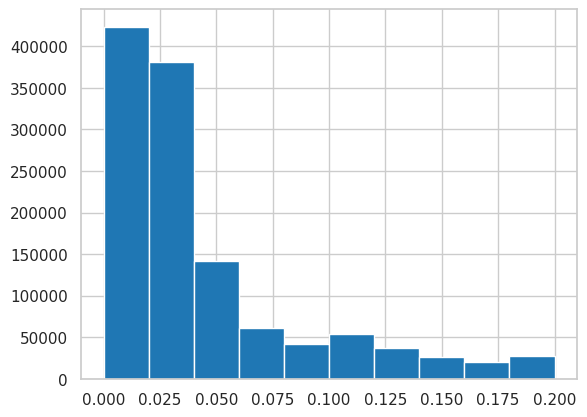

In [6]:
register_df["resolution_bin"].hist()

In [7]:
register_df["resolution_bin_str"].nunique()

KeyError: 'resolution_bin_str'

In [10]:
# Calculate the value counts
value_counts = register_df["resolution_bin"].value_counts()

# Calculate the square root of the counts
sqrt_counts = value_counts.apply(lambda x: x**0.6)

# get the inverse of the square root
class_weights = 1 / sqrt_counts

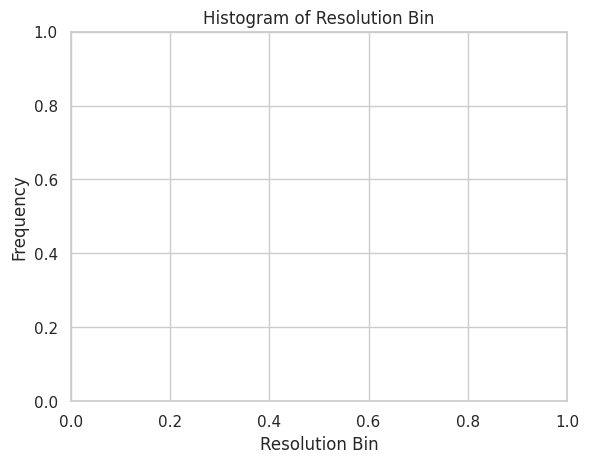

In [14]:
import seaborn as sns

# plot hisogram with value counts multiplied by the class weights
# Set the style and context of seaborn
sns.set_style("whitegrid")
sns.set_context("notebook")

# Plot the histogram
register_df["resolution_bin"].map(class_weights)


# Set the title and labels
plt.title("Histogram of Resolution Bin")
plt.xlabel("Resolution Bin")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [125]:
sample_weights = train_register["resolution_bin"].map(class_weights)

In [122]:
normalized_counts

resolution_bin
0.00    0.028135
0.02    0.029635
0.04    0.048648
0.06    0.074234
0.10    0.078598
0.08    0.089219
0.12    0.094913
0.14    0.112642
0.16    0.129759
0.18    0.146945
0.20    0.167271
Name: count, dtype: float64

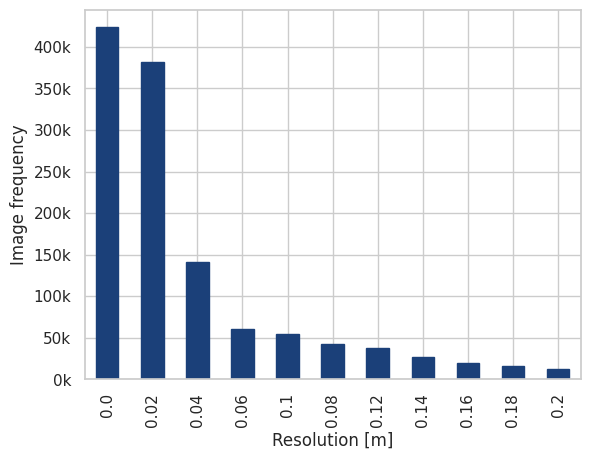

In [28]:
fig = (
    register_df["resolution_bin"]
    .value_counts()
    .plot(kind="bar", xlabel="Resolution [m]", ylabel="Image frequency")
)
import matplotlib.ticker as ticker

ax = plt.gca()  # get the current axes
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: "{:0.0f}k".format(x / 1000))
)

# set bar color to #1B4079 all children
for i, bar in enumerate(fig.patches):
    bar.set_color("#1B4079")

# save the figure
plt.savefig("resolution_bin_histogram.png", dpi=800)

In [22]:
fig.savefig("resolution_bin_histogram.png")

AttributeError: 'Axes' object has no attribute 'savefig'

In [16]:
rounded_inverse_counts.plot(kind="bar")

NameError: name 'rounded_inverse_counts' is not defined

In [104]:
from sklearn.model_selection import StratifiedKFold

base_file_register = (
    register_df.groupby("base_file_name")
    .agg({"resolution_bin": "min", "biome": "first"})
    .reset_index()
)
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# get the train and test file register of the first fold
train_index, test_index = list(
    kfold.split(base_file_register, base_file_register[["biome"]].astype(str))
)[0]
train_files = base_file_register.iloc[train_index]
test_files = base_file_register.iloc[test_index]

train_register = register_df[
    register_df["base_file_name"].isin(train_files["base_file_name"])
]
test_register = register_df[
    register_df["base_file_name"].isin(test_files["base_file_name"])
]

/net/home/jmoehring/.conda/envs/standing-deadwood-env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [101]:
base_file_register.head()

,base_file_name,resolution_bin,biome
0,20191016_FVA_Walddrohnen_Totholz_8_ortho.tif,0.02,4.0
1,20191024_FVA_Walddrohnen_Totholz_7_ortho.tif,0.02,4.0
2,20200720_FVA_Walddrohnen_Totholz_6_ortho.tif,0.00,4.0
3,20210727_FVA_Walddrohnen_Totholz_5_ortho.tif,0.00,4.0
4,20211001_FVA_Walddrohnen_Totholz_3_ortho.tif,0.02,4.0


<Axes: >

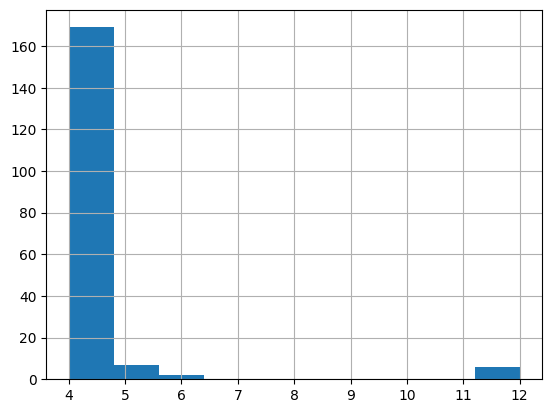

In [102]:
train_files["biome"].hist()

<Axes: >

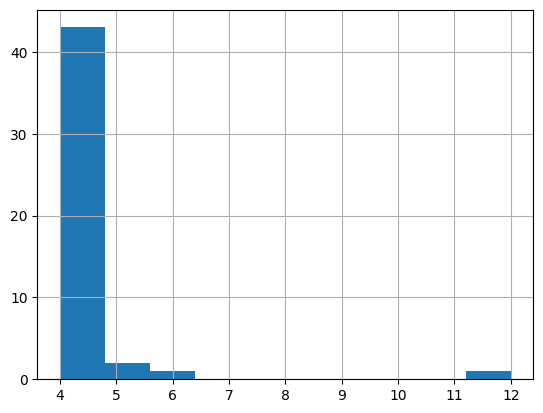

In [103]:
test_files["biome"].hist()

In [3]:
import wandb
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
run_id = "garg20i1"
api = wandb.Api()
experiment = api.run(f"jmoehring/standing-deadwood-unet-pro/{run_id}")

In [5]:
fold = 0
epoch = 19

In [6]:
eval_df_1 = pd.read_csv(
    f"/net/scratch/jmoehring/eval_{experiment.name}_fold_{0}_epoch_{19}.csv"
)

In [7]:
eval_df_2 = pd.read_csv(
    f"/net/scratch/jmoehring/eval_{experiment.name}_fold_{1}_epoch_{12}.csv"
)

In [8]:
eval_df_3 = pd.read_csv(
    f"/net/scratch/jmoehring/eval_{experiment.name}_fold_{2}_epoch_{20}.csv"
)

In [28]:
eval_df_4 = pd.read_csv(
    f"/net/scratch/jmoehring/eval_100k_samples_biome_stratified_onefold_val_fold_0_epoch_20.csv"
)

In [9]:
# union of the two dataframes
eval_df = pd.concat([eval_df_1, eval_df_2, eval_df_3])

In [10]:
# add new column biome names
biome_names = {
    4: "Temperate Broadleaf and Mixed Forests",
    5: "Temperate Coniferous Forests",
    6: "Boreal Forests/Taiga",
    12: "Mediteranean Forests",
}
eval_df["biome_name"] = eval_df["biome"].map(biome_names)

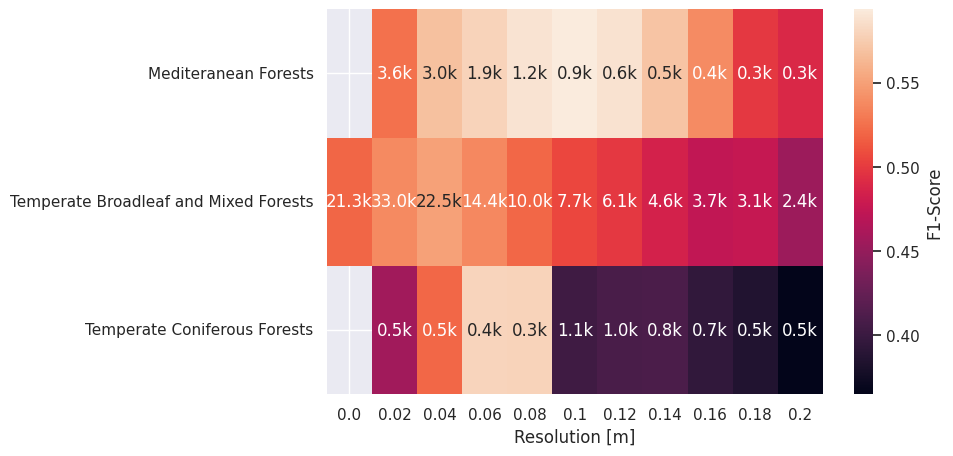

In [15]:
sns.set_theme()
pivoted = eval_df.pivot_table(index="biome_name", columns="resolution_bin", values="f1")
pivoted_labels = (
    eval_df.pivot_table(
        index="biome_name",
        columns="resolution_bin",
        values="f1",
        aggfunc="count",
    )
    / 1000
)
ax = sns.heatmap(
    pivoted,
    cmap="rocket",
    annot=pivoted_labels,
    fmt=".1f",
    cbar_kws={"label": "F1-Score"},
)
# add "k" after the numbers
for t in ax.texts:
    t.set_text(t.get_text() + "k")

ax.set_ylabel("")
ax.set_xlabel("Resolution [m]")
fig = ax.get_figure()
fig.set_size_inches(10, 5)
plt.show()

In [57]:
fig.savefig("f1_score_heatmap.png", dpi=800, bbox_inches="tight")

In [25]:
eval_df["biome"].value_counts()

biome
4.0     633830
12.0     49894
5.0      20321
Name: count, dtype: int64

In [26]:
images_df = register_df.groupby("base_file_name").min("resolution_bin").reset_index()